In [71]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from graphviz  import Source
from IPython.display import SVG, display, HTML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from statsmodels.tsa.seasonal import seasonal_decompose
style = "<style>svg{width: 70% !important; height: 70% !important;} </style>"

In [ ]:
cabin = pd.read_csv('datasets/CABIN_2019.csv', sep = ';')

In [2]:
clas1 = pd.read_csv('datasets/CLASS_012018.csv', sep = ';')
clas2 = pd.read_csv('datasets/CLASS_022018.csv', sep = ';')
clas3 = pd.read_csv('datasets/CLASS_032018.csv', sep = ';')
clas4 = pd.read_csv('datasets/CLASS_042018.csv', sep = ';')
clas5 = pd.read_csv('datasets/CLASS_052018.csv', sep = ';')
clas6 = pd.read_csv('datasets/CLASS_062018.csv', sep = ';')
clas7 = pd.read_csv('datasets/CLASS_072018.csv', sep = ';')
clas8 = pd.read_csv('datasets/CLASS_082018.csv', sep = ';')
clas9 = pd.read_csv('datasets/CLASS_092018.csv', sep = ';')
clas10 = pd.read_csv('datasets/CLASS_102018.csv', sep = ';')
clas11 = pd.read_csv('datasets/CLASS_112018.csv', sep = ';')
clas12 = pd.read_csv('datasets/CLASS_122018.csv', sep = ';')

clas2018 = pd.concat([clas1, clas2, clas3, clas4, clas5, clas6, clas7, clas8, clas9, clas10, clas11, clas12])

In [20]:
clas13 = pd.read_csv('datasets/CLASS_012019.csv', sep = ';')
clas14 = pd.read_csv('datasets/CLASS_022019.csv', sep = ';')
clas15 = pd.read_csv('datasets/CLASS_032019.csv', sep = ';')
clas16 = pd.read_csv('datasets/CLASS_042019.csv', sep = ';')
clas17 = pd.read_csv('datasets/CLASS_052019.csv', sep = ';')
clas18 = pd.read_csv('datasets/CLASS_062019.csv', sep = ';')
clas19 = pd.read_csv('datasets/CLASS_072019.csv', sep = ';')
clas20 = pd.read_csv('datasets/CLASS_082019.csv', sep = ';')
clas21 = pd.read_csv('datasets/CLASS_092019.csv', sep = ';')
clas22 = pd.read_csv('datasets/CLASS_102019.csv', sep = ';')
clas23 = pd.read_csv('datasets/CLASS_112019.csv', sep = ';')
clas24 = pd.read_csv('datasets/CLASS_122019.csv', sep = ';')

clas2019 = pd.concat([clas13, clas14, clas15, clas16, clas17, clas18, clas19, clas20, clas21, clas22, clas23, clas24])

In [13]:
#2018

In [37]:
passed = pd.DataFrame(clas2018.groupby(['DD', 'FLT_NUM', 'SEG_CLASS_CODE'], as_index=False).PASS_BK.agg(max))

In [38]:
passed

,DD,FLT_NUM,SEG_CLASS_CODE,PASS_BK
0,01.01.2018,1125,B,0
1,01.01.2018,1125,C,0
2,01.01.2018,1125,D,2
3,01.01.2018,1125,E,0
4,01.01.2018,1125,G,0
...,...,...,...,...
212363,31.12.2018,6182,U,0
212364,31.12.2018,6182,V,0
212365,31.12.2018,6182,X,2
212366,31.12.2018,6182,Y,0


In [39]:
dates = pd.DataFrame(clas2018.DD.unique()).rename(columns = {0 : 'date'})
dates = dates.sort_values(by = 'date', ascending=1)

In [40]:
dates = pd.DataFrame(clas2018.DD.unique()).rename(columns = {0 : 'date'})
dates = dates.sort_values(by = 'date', ascending=1)

In [41]:
classes = np.array(clas2018.SEG_CLASS_CODE.unique(), dtype=object)
flights = np.array(clas2018.FLT_NUM.unique(), dtype=object)
colossus1 = pd.DataFrame()

In [42]:
temp_dates = dates

In [43]:
for flight in flights:
    for clas in classes:
        temp = passed.query("FLT_NUM == @flight & SEG_CLASS_CODE == @clas")
        temp = temp.sort_values(by = 'DD', ascending=1).rename(columns={'DD' : 'date'})
        dates = dates.merge(temp, how = 'left').fillna(0)
        colossus1 = pd.concat([colossus1, dates])
        dates = temp_dates

In [32]:
for flight in flights:
    temp = passed.query("FLT_NUM == @flight")
    temp = temp.sort_values(by = 'DD', ascending=1).rename(columns={'DD' : 'date'})
    dates = dates.merge(temp, how = 'left').fillna(0)
    colossus_hui = pd.concat([colossus1, dates])
    dates = temp_dates

In [44]:
colossus1

,date,FLT_NUM,SEG_CLASS_CODE,PASS_BK
0,01.01.2018,1125.0,J,2.0
1,01.02.2018,1125.0,J,3.0
2,01.03.2018,1125.0,J,2.0
3,01.04.2018,1125.0,J,4.0
4,01.05.2018,1125.0,J,2.0
...,...,...,...,...
360,31.05.2018,0.0,0,0.0
361,31.07.2018,0.0,0,0.0
362,31.08.2018,0.0,0,0.0
363,31.10.2018,0.0,0,0.0


In [61]:
penisus = pd.DataFrame(colossus1.groupby(['date']).PASS_BK.agg(sum))

In [62]:
penisus

,PASS_BK
date,
01.01.2018,1493.0
01.02.2018,3406.0
01.03.2018,3889.0
01.04.2018,4139.0
01.05.2018,3650.0
...,...
31.05.2018,3829.0
31.07.2018,4292.0
31.08.2018,4250.0


<Axes: xlabel='date', ylabel='PASS_BK'>

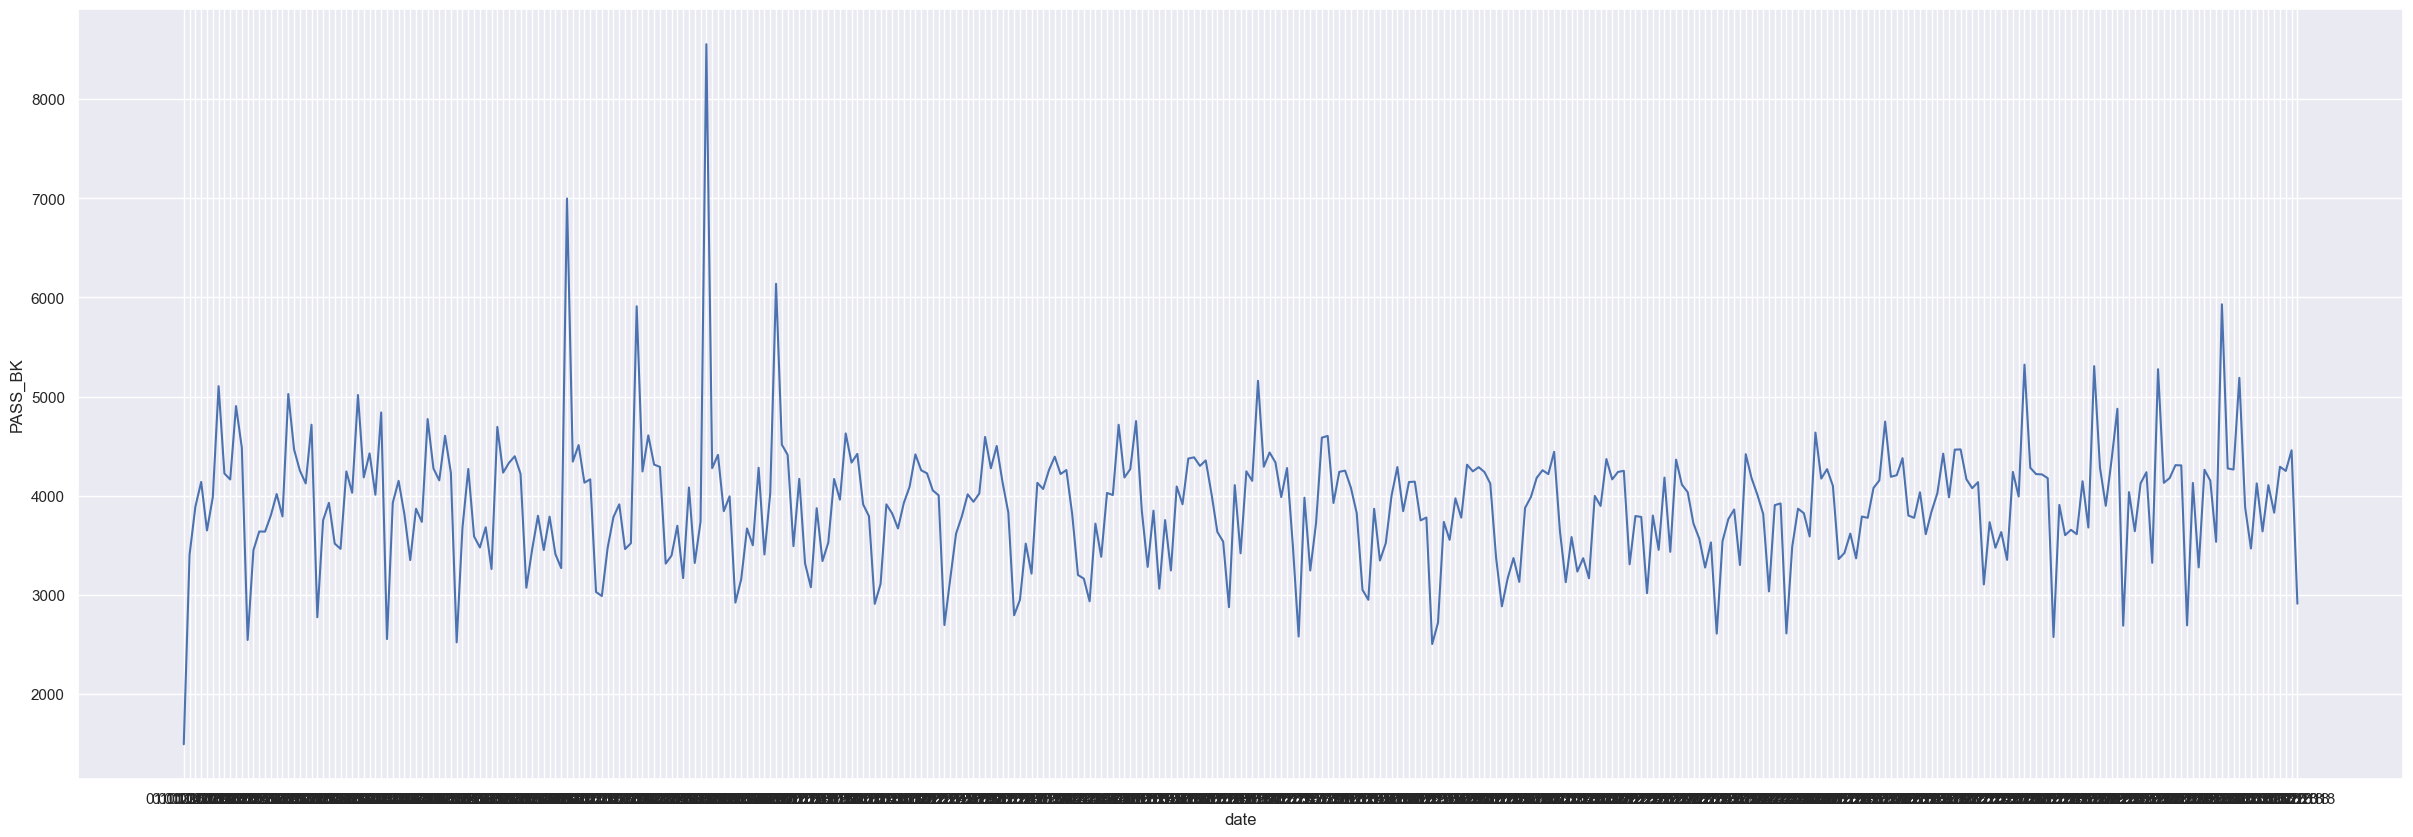

In [98]:
sns.set (rc={"figure.figsize":( 30 , 10 )})
sns.lineplot(data=penisus, x='date', y='PASS_BK')

In [88]:
res = seasonal_decompose(penisus['PASS_BK'],model='additive', period=12)

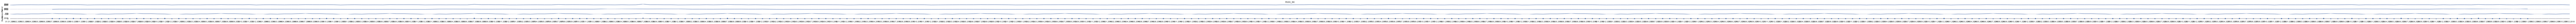

In [89]:
ax=res.plot()
plt.show()

In [20]:
#2019

In [21]:
passed = pd.DataFrame(clas2019.groupby(['DD', 'FLT_NUM', 'SEG_CLASS_CODE'], as_index=False).PASS_BK.agg(max))

In [22]:
dates = pd.DataFrame(clas2019.DD.unique()).rename(columns = {0 : 'date'})
dates = dates.sort_values(by = 'date', ascending=1)

In [23]:
classes = np.array(clas2019.SEG_CLASS_CODE.unique(), dtype=object)
flights = np.array(clas2019.FLT_NUM.unique(), dtype=object)
colossus2 = pd.DataFrame()

In [24]:
temp_dates = dates

In [25]:
for flight in flights:
    for clas in classes:
        temp = passed.query("FLT_NUM == @flight & SEG_CLASS_CODE == @clas")
        temp = temp.sort_values(by = 'DD', ascending=1).rename(columns={'DD' : 'date'})
        dates = dates.merge(temp, how = 'left').fillna(0)
        colossus2 = pd.concat([colossus2, dates])
        dates = temp_dates

In [26]:
#to_json

In [27]:
colossus1_split = colossus1.to_json (orient='split')
colossus1_records = colossus1.to_json (orient='records')
colossus2_split = colossus2.to_json (orient='split')
colossus2_records = colossus2.to_json (orient='records')

In [28]:
with open('colossus1_split.json', 'w') as f:
    f.write(colossus1_split)
with open('colossus1_records.json', 'w') as f:
    f.write(colossus1_records)
with open('colossus2_split.json', 'w') as f:
    f.write(colossus2_split)
with open('colossus2_records.json', 'w') as f:
    f.write(colossus2_records)